In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
airport_data = pd.read_csv('airports.csv')

In [3]:
flight_data = pd.read_csv('flights.csv')

In [4]:
merged_data = flight_data.merge(airport_data, left_on='OriginAirportID', right_on='airport_id', how='inner')
merged_data = merged_data.drop(columns=['airport_id'])

In [5]:
merged_data

,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay,city,state,name
0,19,5,DL,11433,13303,-3,1,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,11433,11298,22,41,Detroit,MI,Detroit Metro Wayne County
2,19,5,DL,11433,12892,-2,-7,Detroit,MI,Detroit Metro Wayne County
3,19,5,DL,11433,12953,-3,-10,Detroit,MI,Detroit Metro Wayne County
4,20,6,DL,11433,13487,-3,-5,Detroit,MI,Detroit Metro Wayne County
...,...,...,...,...,...,...,...,...,...,...
2702213,27,7,AS,13891,14747,-12,4,Ontario,CA,Ontario International
2702214,27,7,AS,13891,14747,-7,0,Ontario,CA,Ontario International
2702215,31,4,AS,13891,14747,-10,-11,Ontario,CA,Ontario International
2702216,31,4,AS,13891,14747,-10,-7,Ontario,CA,Ontario International


# Pairplot

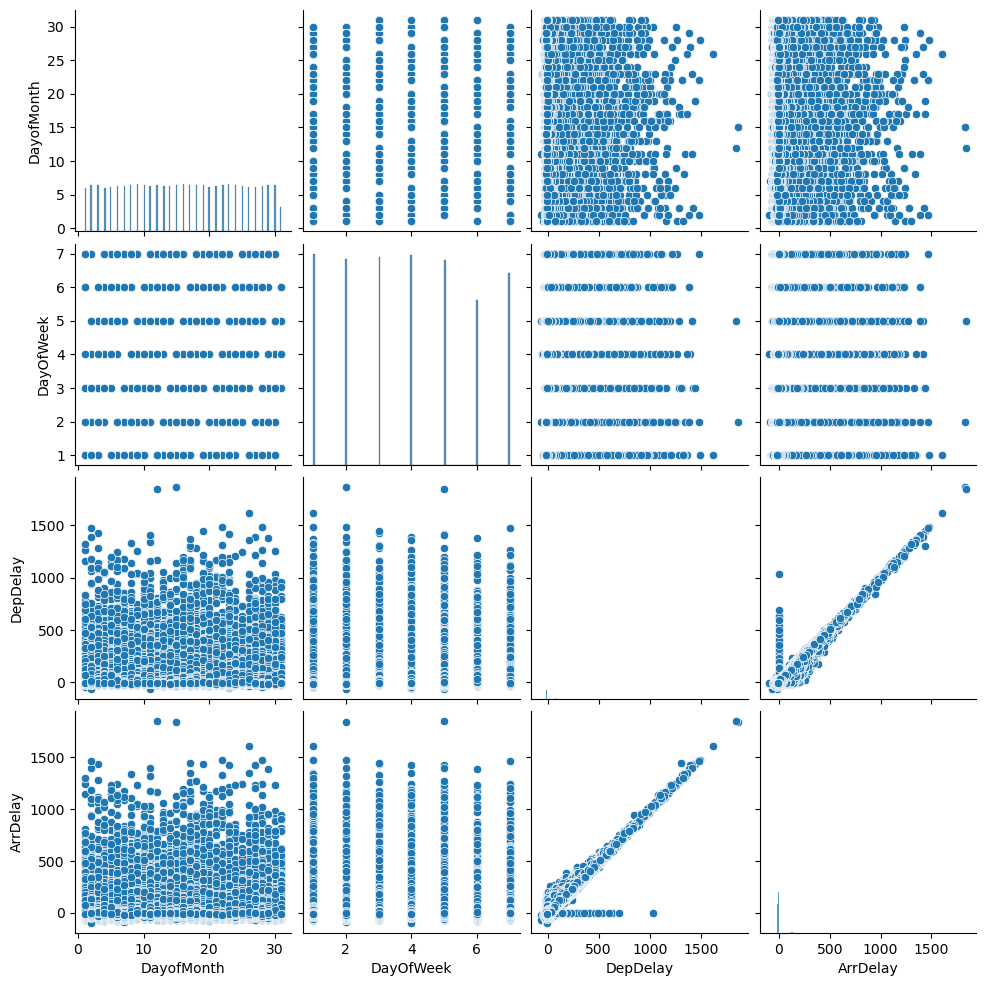

In [18]:
sns.pairplot(merged_data[['DayofMonth', 'DayOfWeek' , 'DepDelay','ArrDelay']])
plt.show()

# Heatmap

In [6]:
merged_data.corr()

C:\Users\HP SSD\AppData\Local\Temp\ipykernel_13908\2411631530.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.corr()


,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,DepDelay,ArrDelay
DayofMonth,1.000000,0.023004,-0.000623,-0.000607,0.006390,0.008211
DayOfWeek,0.023004,1.000000,0.003375,0.003231,-0.005671,-0.012356
OriginAirportID,-0.000623,0.003375,1.000000,0.004527,-0.019013,-0.009965
DestAirportID,-0.000607,0.003231,0.004527,1.000000,0.005078,-0.004301
DepDelay,0.006390,-0.005671,-0.019013,0.005078,1.000000,0.939256
ArrDelay,0.008211,-0.012356,-0.009965,-0.004301,0.939256,1.000000


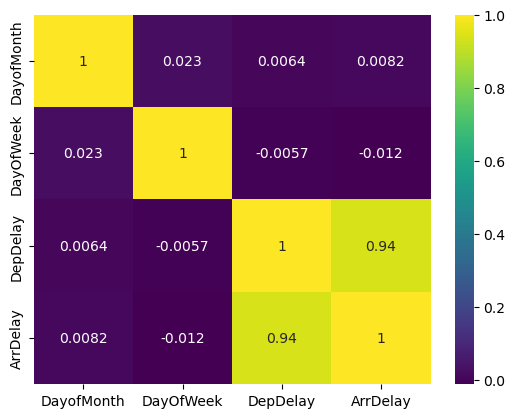

In [7]:
correlation_matrix = merged_data[['DayofMonth', 'DayOfWeek', 'DepDelay', 'ArrDelay']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

# Boxplot 

In [8]:
merged_data['Carrier']

0          DL
1          DL
2          DL
3          DL
4          DL
           ..
2702213    AS
2702214    AS
2702215    AS
2702216    AS
2702217    AS
Name: Carrier, Length: 2702218, dtype: object

In [9]:
merged_data['DepDelay']

0          -3
1          22
2          -2
3          -3
4          -3
           ..
2702213   -12
2702214    -7
2702215   -10
2702216   -10
2702217    -8
Name: DepDelay, Length: 2702218, dtype: int64

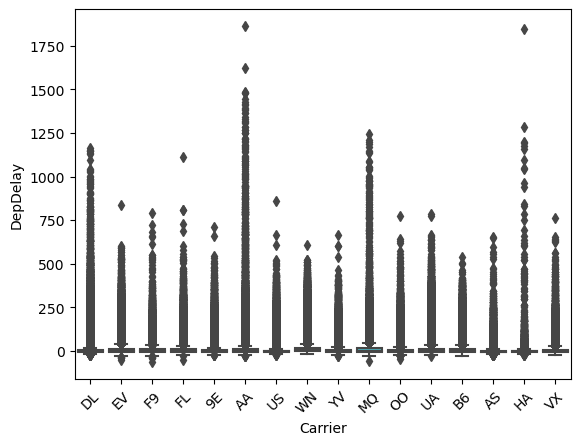

In [10]:
sns.boxplot(x='Carrier', y='DepDelay', data=merged_data)
plt.xticks(rotation=45)
plt.show()

# Countplot

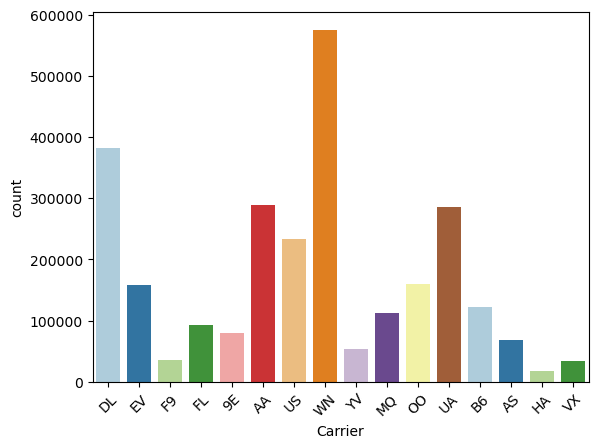

In [11]:
sns.countplot(x='Carrier', data=merged_data,palette='Paired')
plt.xticks(rotation=45)
plt.show()

# Top 10 Airports by Name, City, and State

In [12]:
merged_data.groupby(['city', 'state', 'name']).size().reset_index

<bound method Series.reset_index of city                        state  name                                                
Albuquerque                 NM     Albuquerque International Sunport                        17542
Anchorage                   AK     Ted Stevens Anchorage International                       7700
Atlanta                     GA     Hartsfield-Jackson Atlanta International                148563
Austin                      TX     Austin - Bergstrom International                         26982
Baltimore                   MD     Baltimore/Washington International Thurgood Marshall     51761
                                                                                            ...  
Tampa                       FL     Tampa International                                      35149
Tucson                      AZ     Tucson International                                     10990
Washington                  DC     Ronald Reagan Washington National                        

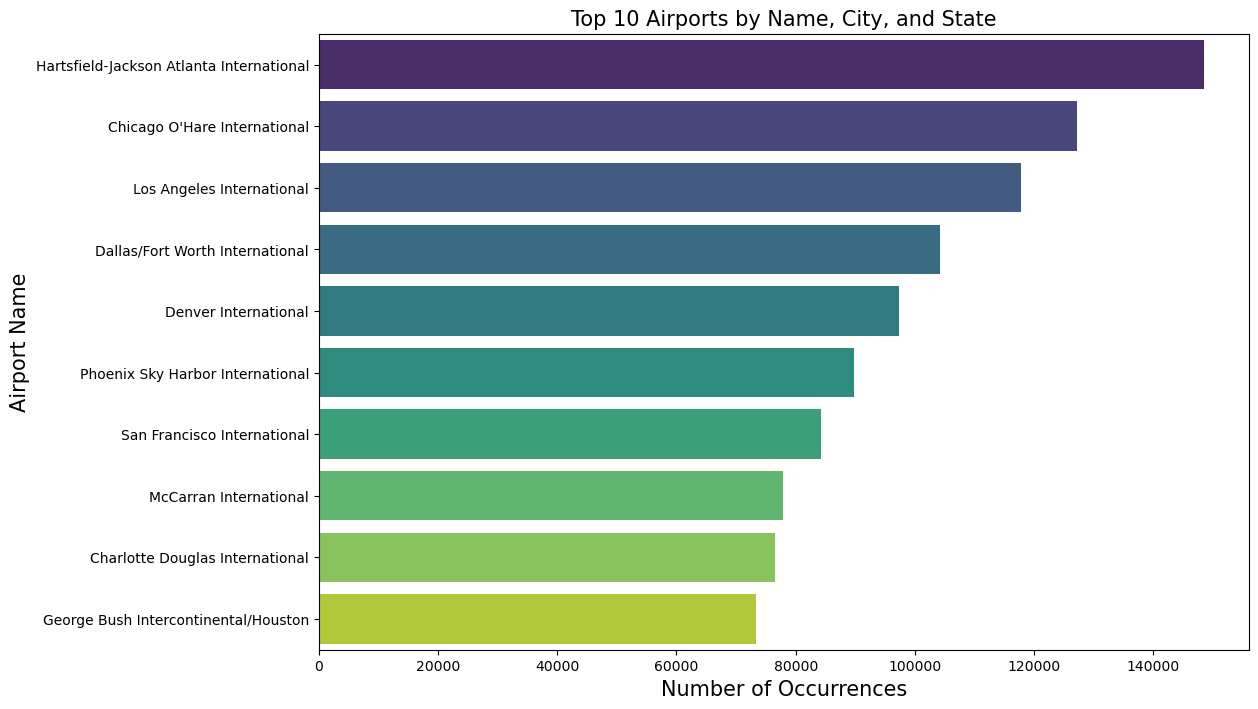

In [13]:
airport_counts = merged_data.groupby(['city', 'state', 'name']).size().reset_index(name='count')
airport_counts = airport_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='name', data=airport_counts.head(10), palette="viridis")
plt.xlabel('Number of Occurrences',size=15)
plt.ylabel('Airport Name',size=15)
plt.title('Top 10 Airports by Name, City, and State',size=15)
plt.show()

# Top 10 Origin and Destination Airport ID

In [14]:
top_origin_airports = merged_data['OriginAirportID'].value_counts().head(10)
top_dest_airports = merged_data['DestAirportID'].value_counts().head(10)

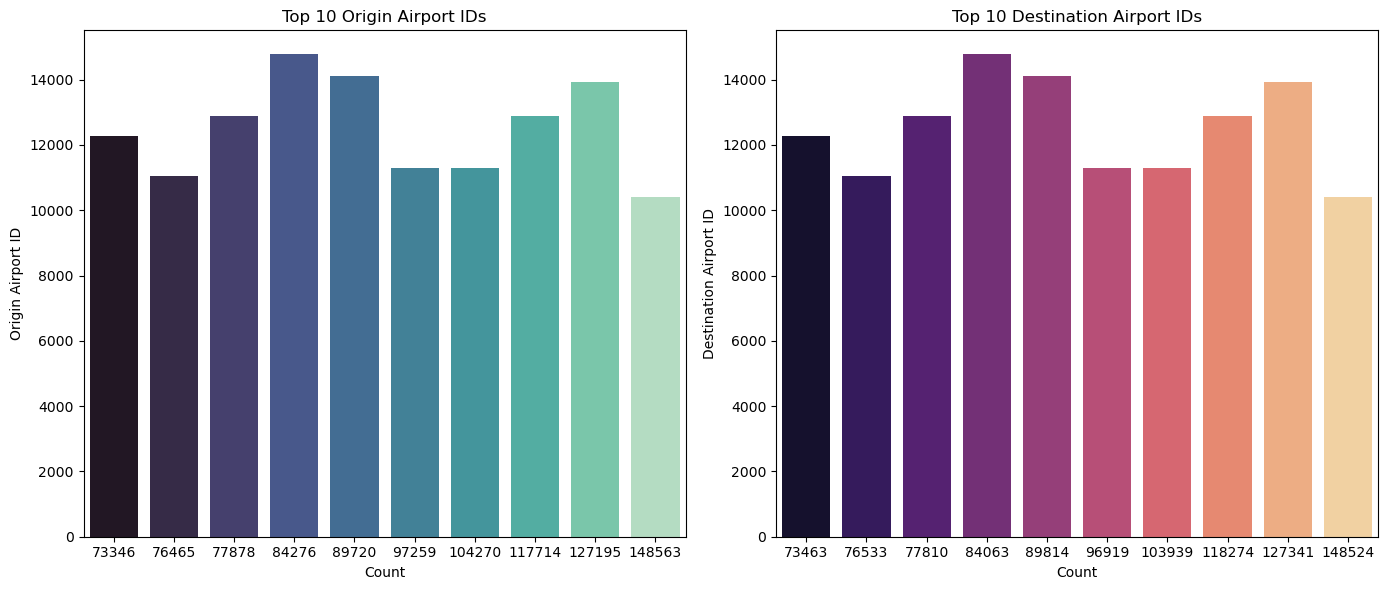

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.barplot(x=top_origin_airports.values, y=top_origin_airports.index,ax=axes[0], palette="mako")
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Origin Airport ID')
axes[0].set_title('Top 10 Origin Airport IDs')
sns.barplot(x=top_dest_airports.values, y=top_dest_airports.index,ax=axes[1], palette="magma")
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Destination Airport ID')
axes[1].set_title('Top 10 Destination Airport IDs')
plt.tight_layout()
plt.show()

# DepDelay and ArrDelay

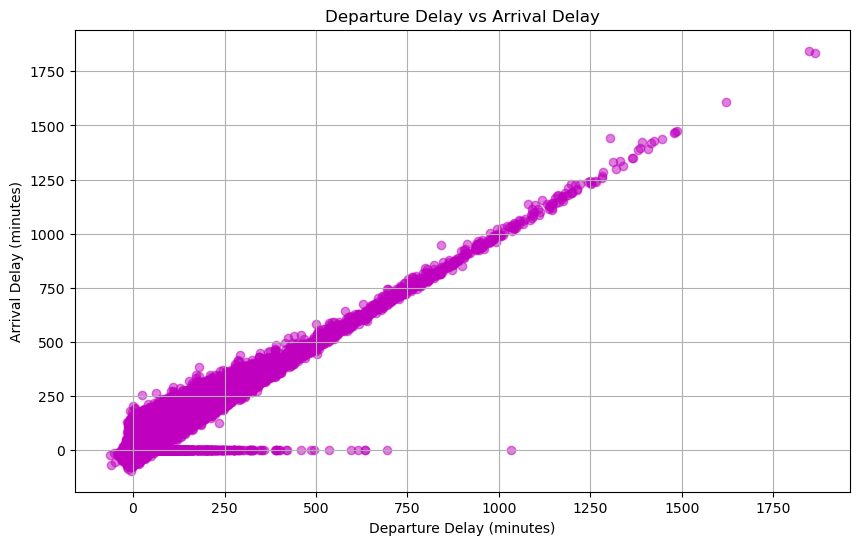

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['DepDelay'], merged_data['ArrDelay'], alpha=0.5, color='m')
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()